## Setting Up Environment and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Dataset
from ucimlrepo import fetch_ucirepo 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 

X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

In [3]:
print(X.describe())
print(X.info())
print(y.value_counts())

       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

## Exploratory Data Analysis

In [4]:
if not os.path.exists('EDA_visualizations'):
    os.makedirs('EDA_visualizations')

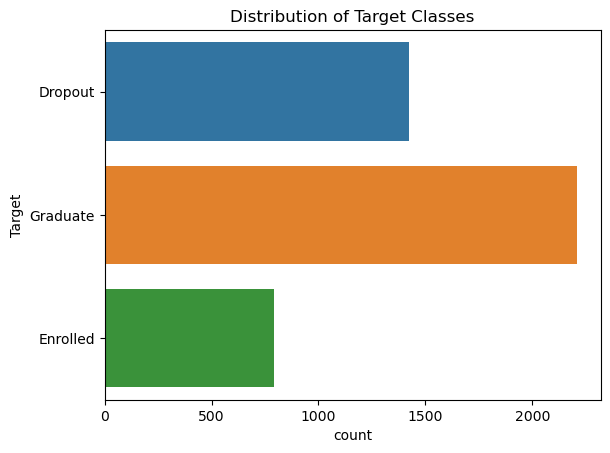

In [5]:
# Distribution of Target Classes

sns.countplot(y='Target', data=y)
plt.title('Distribution of Target Classes')
plt.savefig(f'EDA_visualizations/1Target_Class.png')
plt.show()

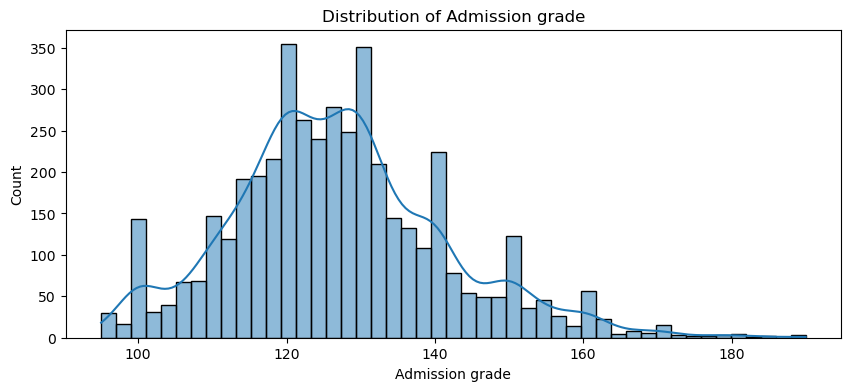

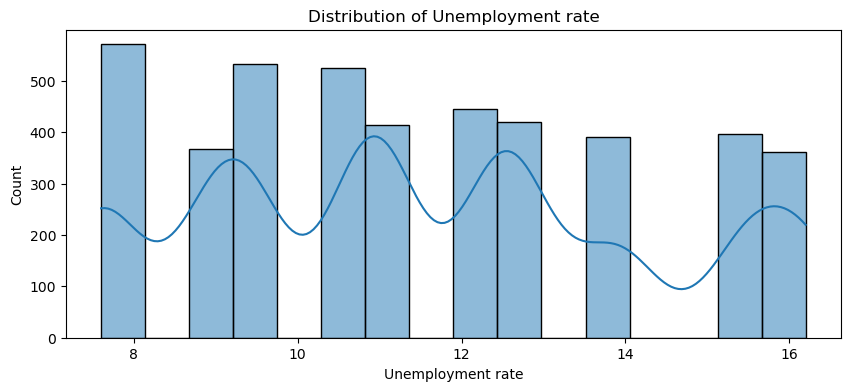

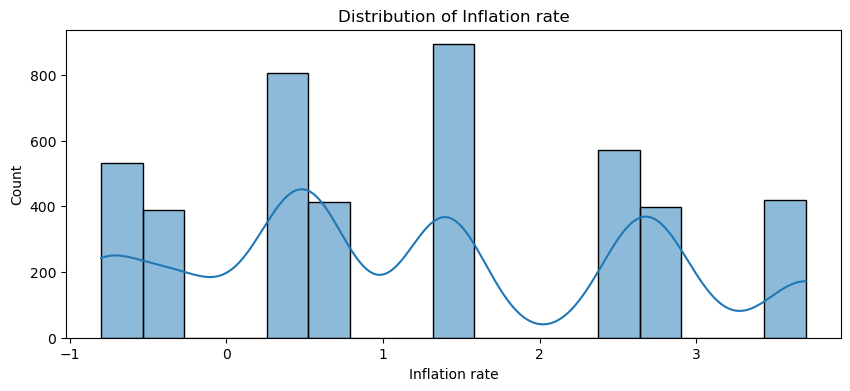

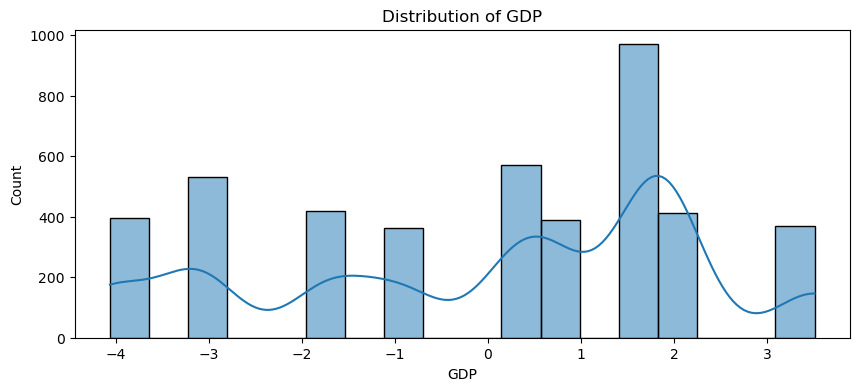

In [6]:
# Distribution of Numerical Features

numerical_features = ['Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.savefig(f'EDA_visualizations/distribution_{feature}.png')
    plt.show()

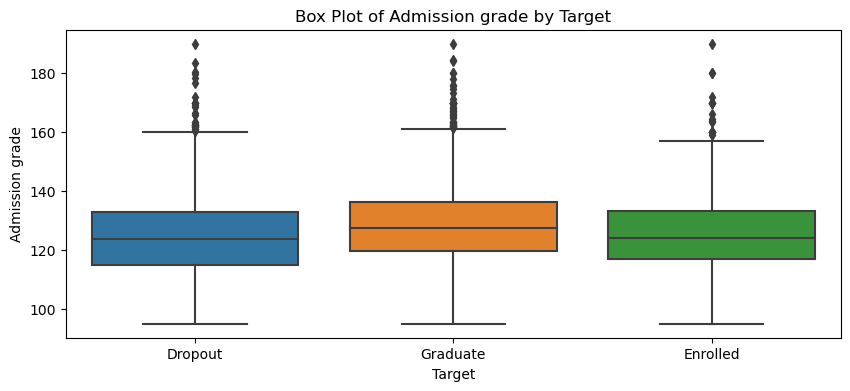

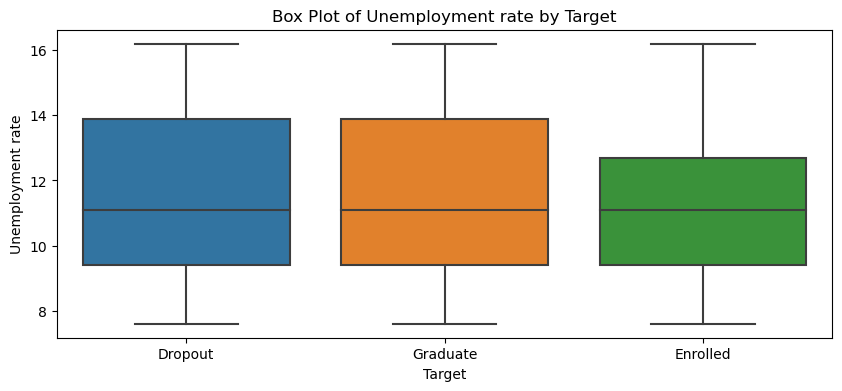

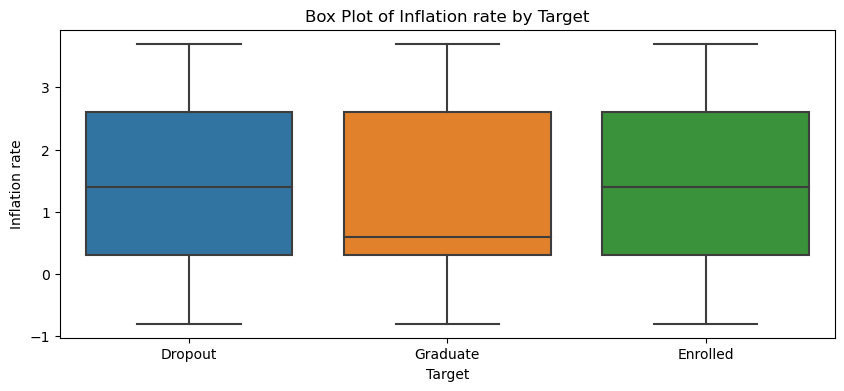

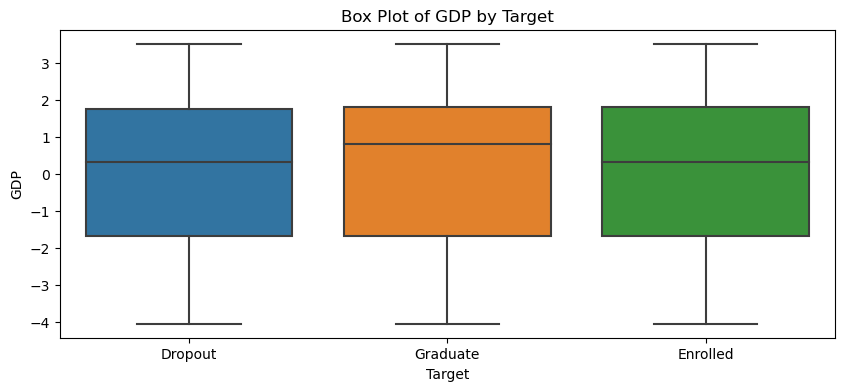

In [7]:
# Box Plots for Numerical Features

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=y.squeeze(), y=X[feature])  # Using squeeze() to ensure y is 1D
    plt.title(f'Box Plot of {feature} by Target')
    plt.savefig(f'EDA_visualizations/boxplot_{feature}.png')
    plt.show()

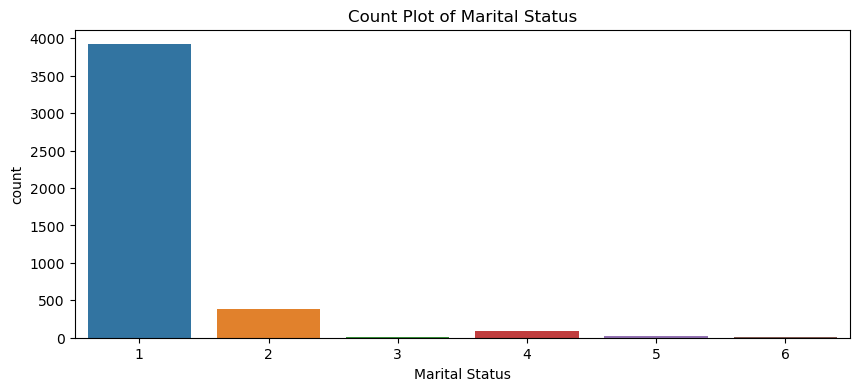

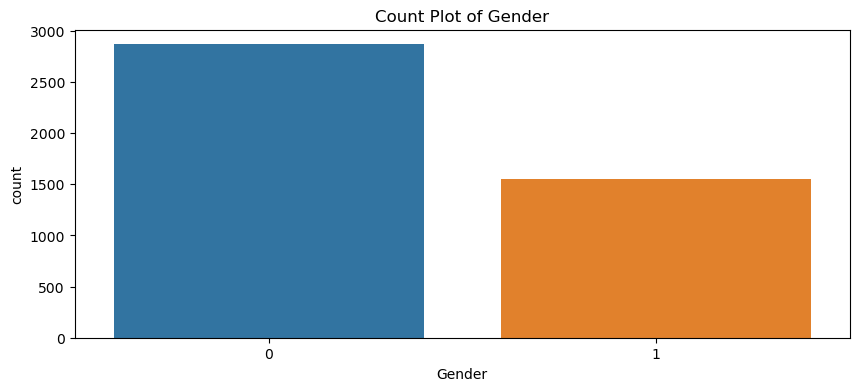

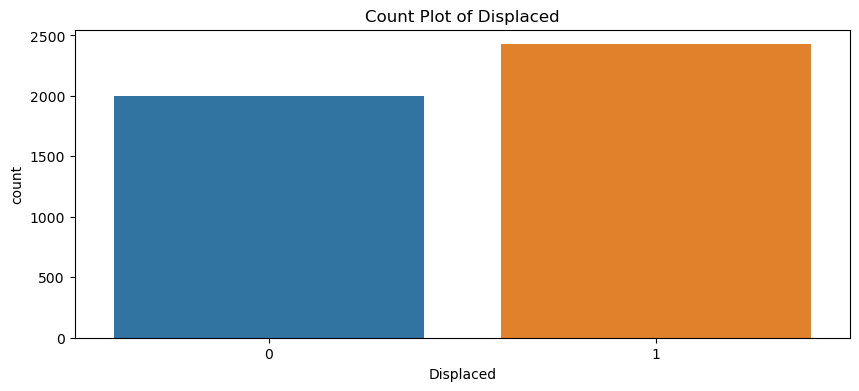

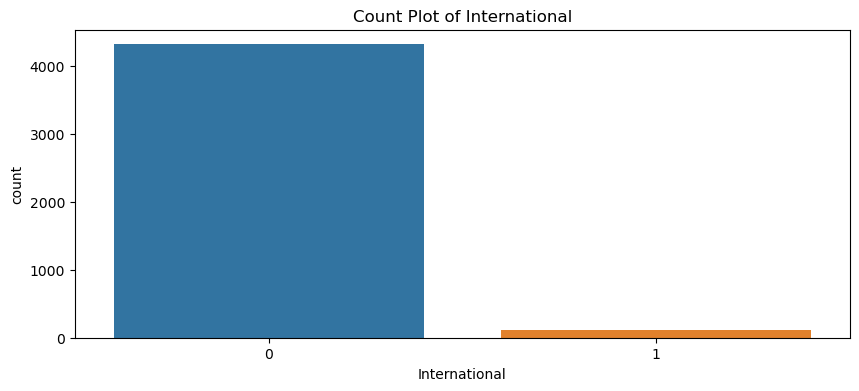

In [8]:
# Count Plots for Categorical Features

categorical_features = ['Marital Status', 'Gender', 'Displaced', 'International']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=X[feature])
    plt.title(f'Count Plot of {feature}')
    plt.savefig(f'EDA_visualizations/countplot_{feature}.png')
    plt.show()

In [9]:
# Correlation Heatmap

plt.figure(figsize=(100, 100))
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot_kws={"size": 30})

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Correlation Heatmap', fontsize=60)
plt.savefig('EDA_visualizations/correlation_heatmap.png')
plt.show()

In [10]:
print(corr)

                                                Marital Status  \
Marital Status                                        1.000000   
Application mode                                      0.264006   
Application order                                    -0.125854   
Course                                                0.046365   
Daytime/evening attendance                           -0.274939   
Previous qualification                                0.062529   
Previous qualification (grade)                       -0.022406   
Nacionality                                          -0.008843   
Mother's qualification                                0.193163   
Father's qualification                                0.130353   
Mother's occupation                                   0.034994   
Father's occupation                                   0.031609   
Admission grade                                      -0.004771   
Displaced                                            -0.234886   
Educationa

## Correlation Analysis

In [11]:
# Correlation with Target added:

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y.values.ravel())
X['Target'] = y_encoded
correlation_matrix = X.corr()
target_correlations = correlation_matrix['Target']
sorted_target_correlations = target_correlations.sort_values(key=abs, ascending=False)
print(sorted_target_correlations)
X.drop('Target', axis=1, inplace=True)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Age at enrollment                                -0.243438
Debtor                                           -0.240999
Gender                                           -0.229270
Application mode                                 -0.221747
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Admission grade                                   0.120889
Displaced                                         0.113986
Previous qualification (grade)                    0.103764
Curricular units 2nd sem (without evaluations)   -0.0940

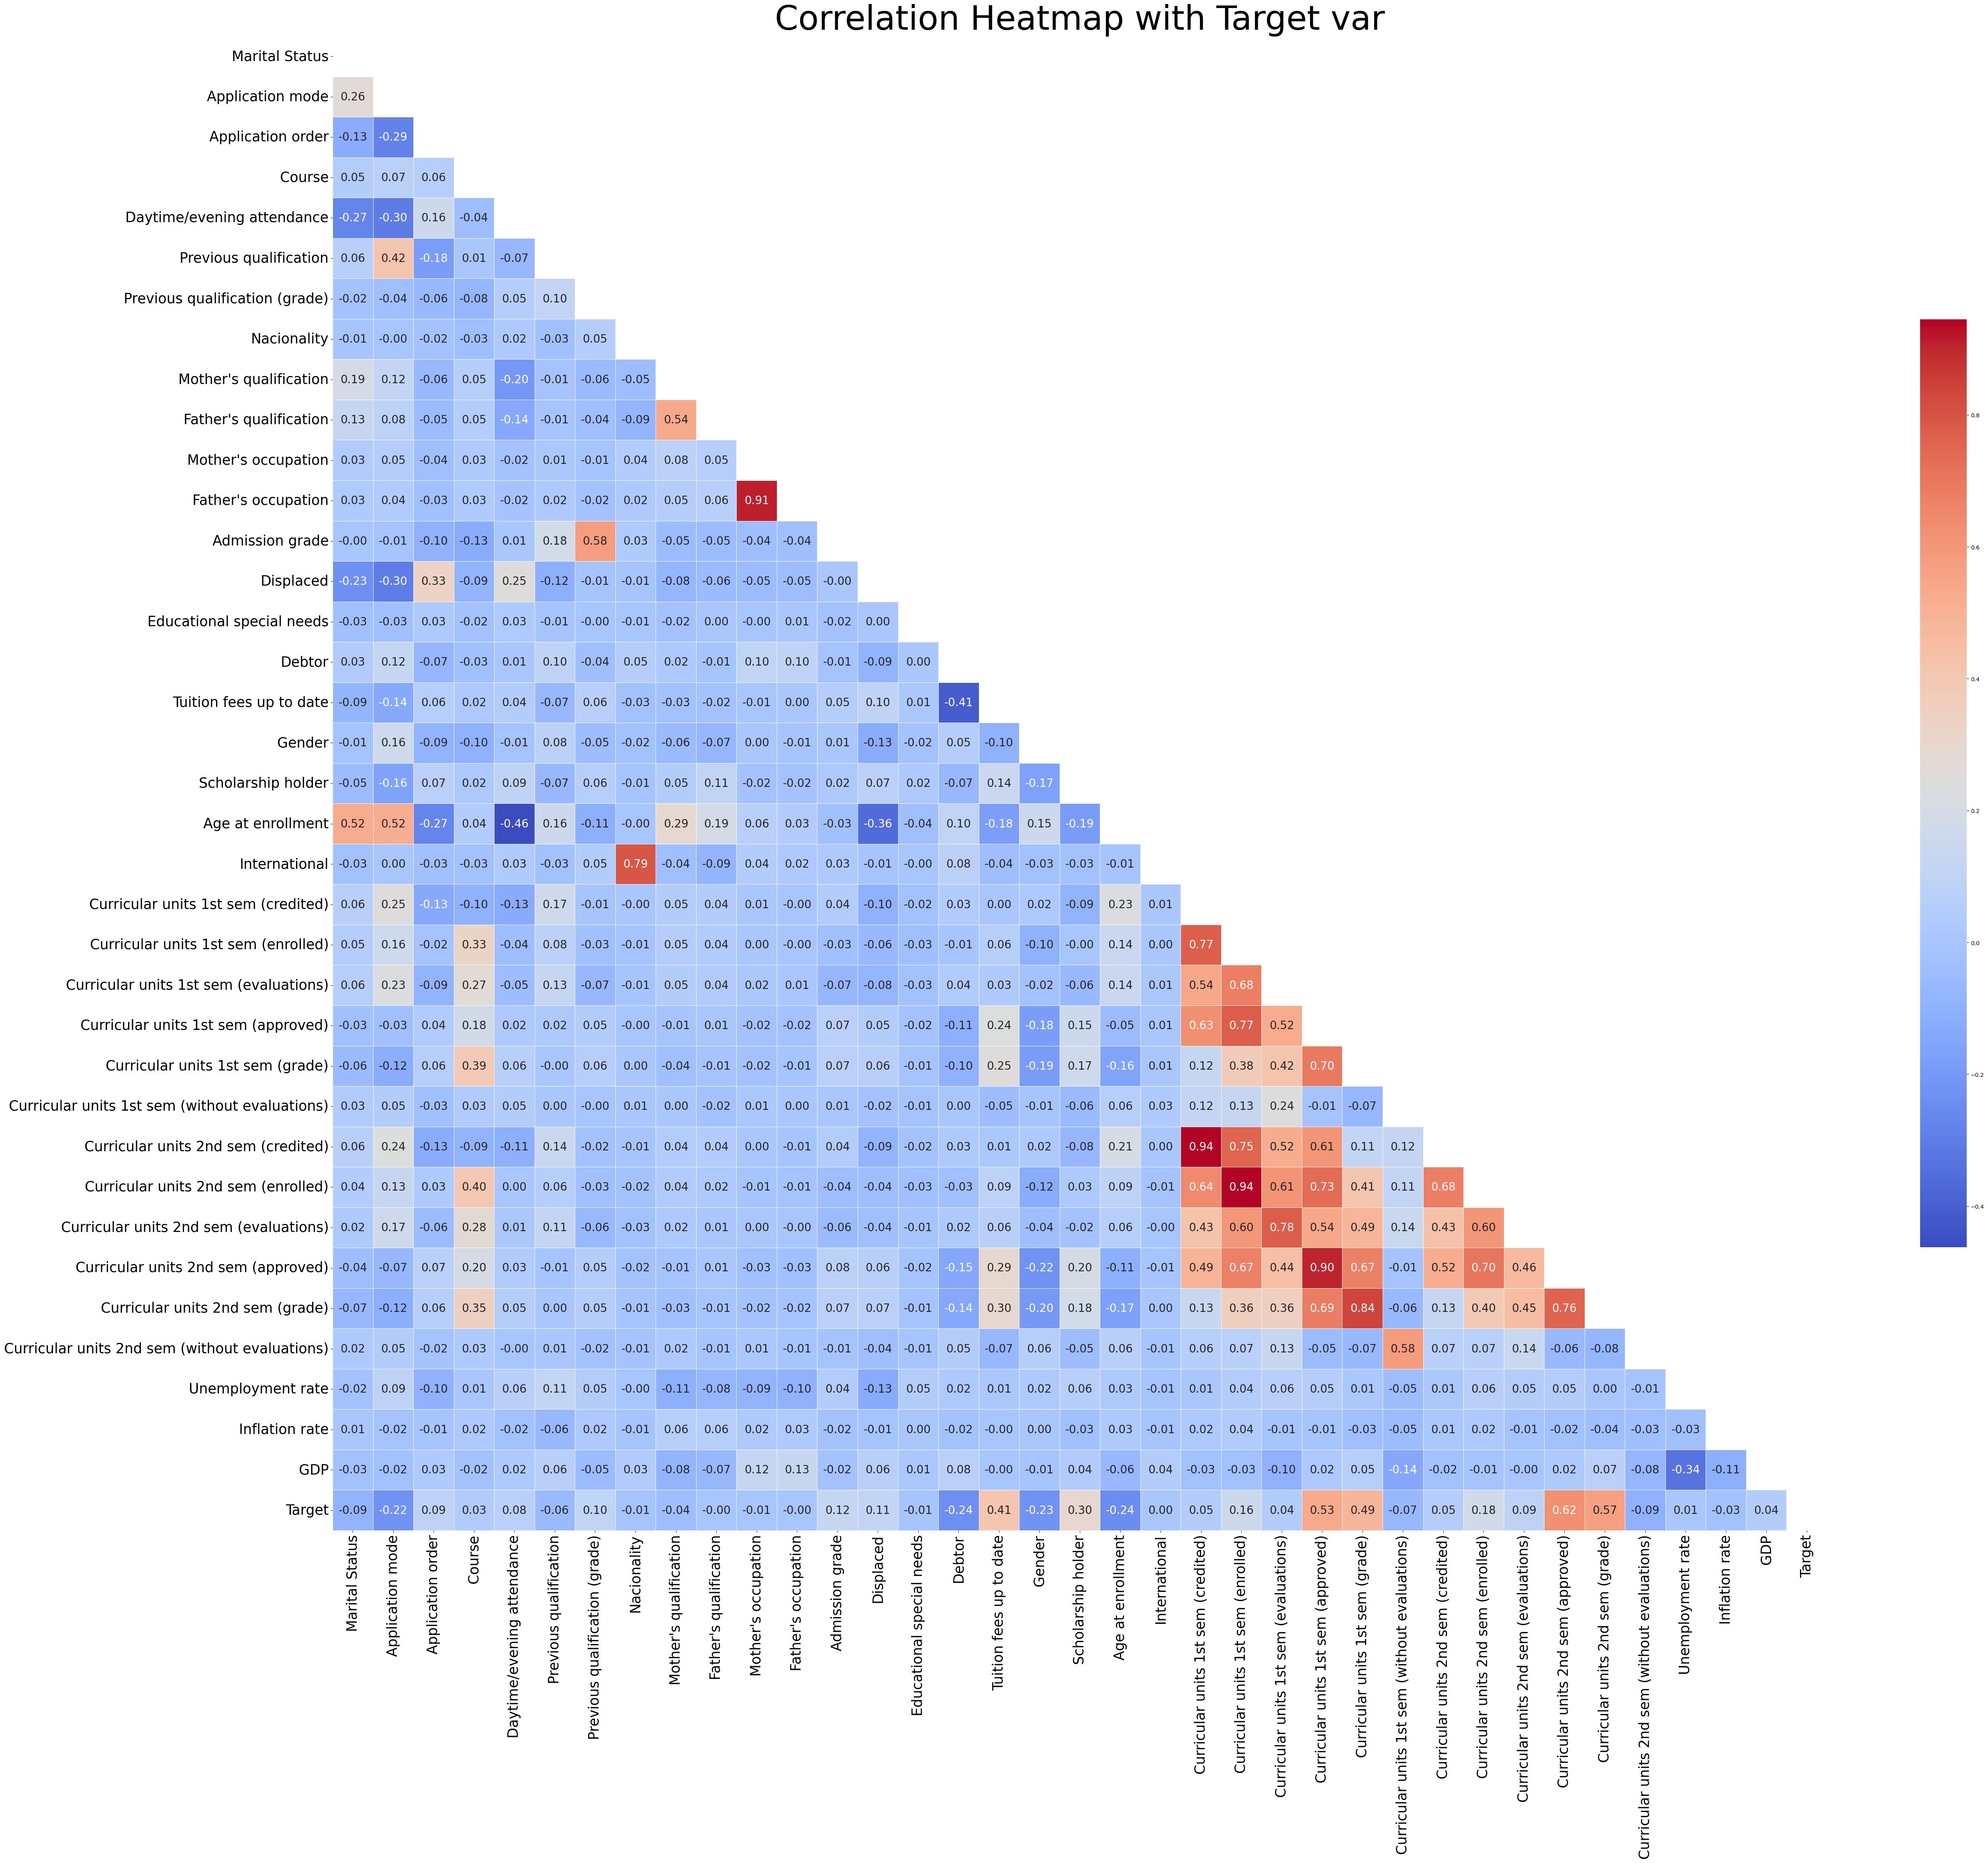

In [12]:
# Heatmap with Target Added -

plt.figure(figsize=(60, 60))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 20})

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Correlation Heatmap with Target var', fontsize=60)
plt.savefig('EDA_visualizations/correlation_heatmap_w_target.png')
plt.show()


## Correlation Analysis with Target Variable

The correlation analysis between feature variables and the target variable revealed several significant relationships:

### Strong Positive Correlations
- `Curricular units 2nd sem (approved)`: Positive correlation (r = 0.624157) suggests a strong relationship where students with a higher number of approved curricular units in the second semester are more likely to have a positive outcome.
- `Curricular units 2nd sem (grade)`: Positive correlation (r = 0.566827) indicates that students with higher grades in the second semester are more likely to have a positive outcome.
- `Curricular units 1st sem (approved)`: Positive correlation (r = 0.529123) also points to a similar trend as with second-semester approvals.
- `Curricular units 1st sem (grade)`: Positive correlation (r = 0.485207) demonstrates the importance of first-semester grades in predicting the target variable.

### Strong Negative Correlations
- `Age at enrollment`: Negative correlation (r = -0.243438) suggests that older students at the time of enrollment may have a lower likelihood of a positive outcome.
- `Debtor`: Negative correlation (r = -0.240999) indicates that students with outstanding debts are less likely to achieve a positive outcome.
- `Gender`: Negative correlation (r = -0.229270) may reflect that the gender of students could have an impact on the target variable, with the coding of gender needing clarification for interpretation.
- `Application mode`: Negative correlation (r = -0.221747) suggests that the mode of application could influence student outcomes.

### Other Notable Correlations
- `Tuition fees up to date`: Positive correlation (r = 0.409827) implies that students who are current with their tuition payments are more likely to have a positive outcome.
- `Scholarship holder`: Positive correlation (r = 0.297595) suggests that receiving a scholarship is associated with a positive outcome.

### Minimal or No Correlation
Several features showed minimal or no linear correlation with the target variable, indicating that they might not be significant predictors in the context of the other features.

These results highlight the importance of academic performance indicators such as curricular unit approvals and grades in predicting student success. Financial factors such as being a debtor or staying current with tuition fees also play a significant role. Demographic and enrollment characteristics such as age, gender, and application mode require further investigation to understand their impact on student outcomes.


## Feature Engineering

In [13]:
data = {
    'Curricular units 1st sem (approved)': [3, 4, 5],
    'Curricular units 1st sem (enrolled)': [5, 5, 5],
    'Curricular units 2nd sem (approved)': [2, 3, 4],
    'Curricular units 2nd sem (enrolled)': [5, 5, 5],
    'Age at enrollment': [18, 25, 35],
    'Debtor': [0, 1, 0],
    'Tuition fees up to date': [1, 0, 1],
    'Scholarship holder': [0, 1, 0],
    'Previous qualification (grade)': [150, 120, 180]
}
X = pd.DataFrame(data)

# Ratio features
X['Approval rate 1st sem'] = X['Curricular units 1st sem (approved)'] / X['Curricular units 1st sem (enrolled)']
X['Approval rate 2nd sem'] = X['Curricular units 2nd sem (approved)'] / X['Curricular units 2nd sem (enrolled)']

# Binned age groups
X['Binned age'] = pd.cut(X['Age at enrollment'], bins=[0, 20, 30, 40, float('inf')], labels=['Under 20', '20-30', '31-40', 'Over 40'])

# Interaction features
X['1st and 2nd sem approved interaction'] = X['Curricular units 1st sem (approved)'] * X['Curricular units 2nd sem (approved)']

# Financial Stability Index
X['Financial Stability Index'] = X['Tuition fees up to date'] - X['Debtor'] + X['Scholarship holder']

# Normalized previous qualification grade
max_grade = X['Previous qualification (grade)'].max()
X['Normalized Previous qualification (grade)'] = X['Previous qualification (grade)'] / max_grade

In [14]:
if not os.path.exists('EDA_visualizations_w_Feature_Engineering'):
    os.makedirs('EDA_visualizations_w_Feature_Engineering')

## Further Data Analysis with New Combined Features

In [15]:
# List of new feature names
new_features = [
    'Approval rate 1st sem', 
    'Approval rate 2nd sem', 
    'Binned age', 
    '1st and 2nd sem approved interaction', 
    'Financial Stability Index', 
    'Normalized Previous qualification (grade)'
]

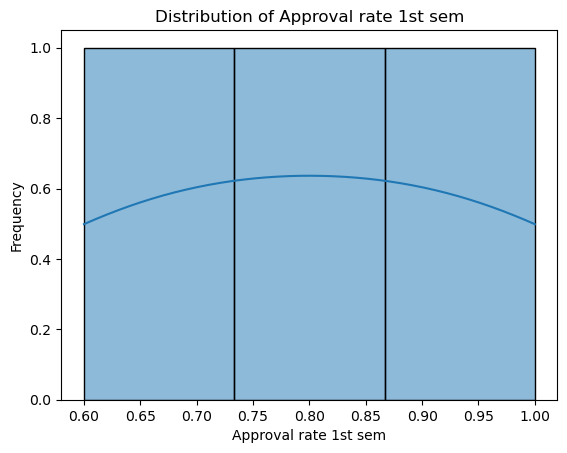

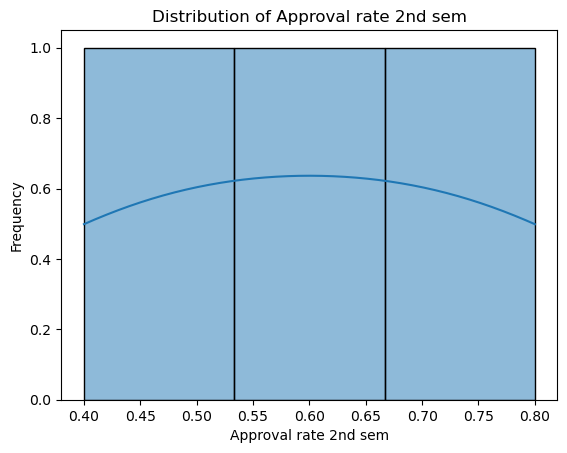

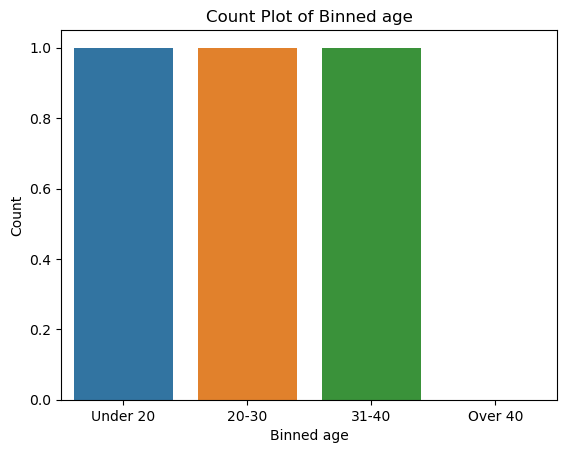

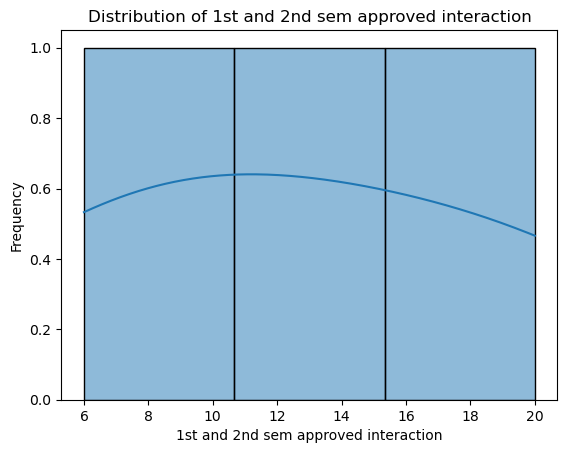

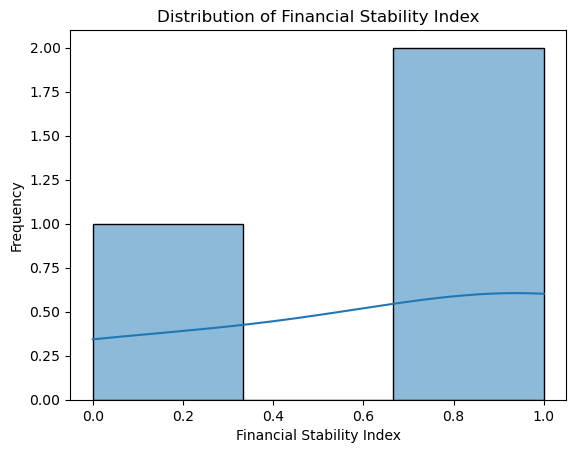

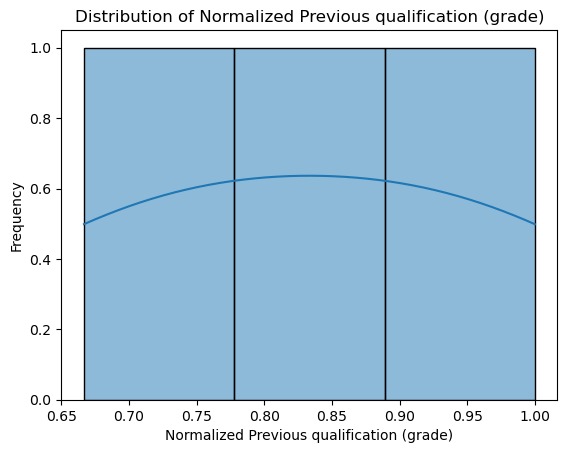

In [16]:
# Histograms/Density Plots for Distribution Analysis

for feature in new_features:
    if X[feature].dtype == 'float64' or X[feature].dtype == 'int64':  # For continuous variables
        sns.histplot(X[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.savefig(f'EDA_visualizations_w_Feature_Engineering/distribution_{feature}.png')
        plt.show()
    elif X[feature].dtype.name == 'category':  # For categorical variables
        sns.countplot(x=feature, data=X)
        plt.title(f'Count Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.savefig(f'EDA_visualizations_w_Feature_Engineering/countplot_{feature}.png')
        plt.show()

Correlation with Target:
 Binned age_20-30                             1.000000e+00
0                                            1.000000e+00
Approval rate 1st sem                        3.204938e-17
Approval rate 2nd sem                       -2.083210e-16
1st and 2nd sem approved interaction        -8.219949e-02
Binned age_Under 20                         -5.000000e-01
Binned age_31-40                            -5.000000e-01
Normalized Previous qualification (grade)   -8.660254e-01
Financial Stability Index                   -1.000000e+00
Binned age_Over 40                                    NaN
Name: 0, dtype: float64


/Users/abraar/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


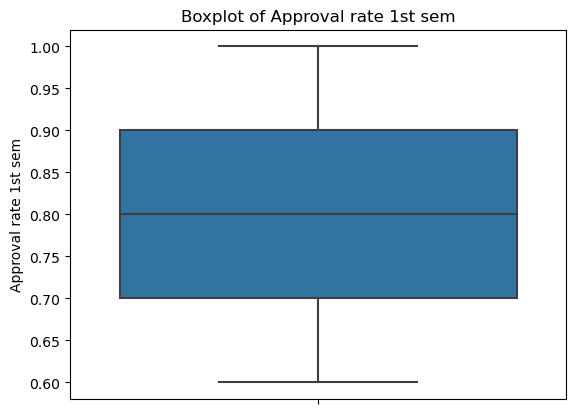

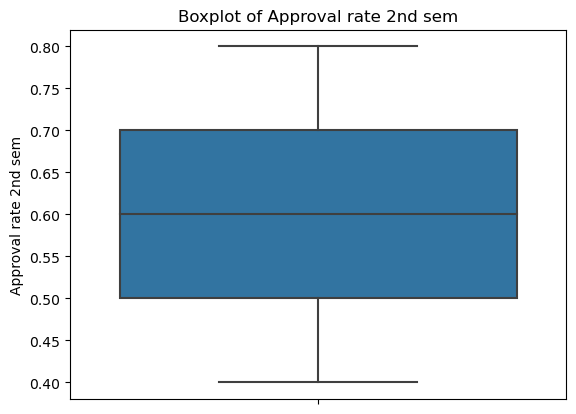

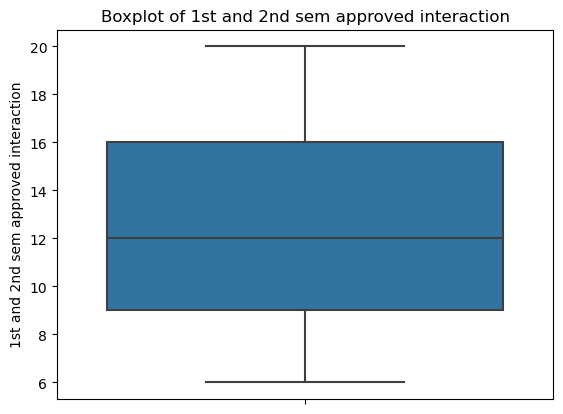

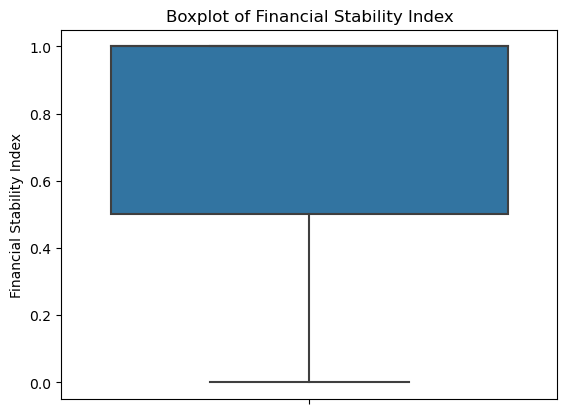

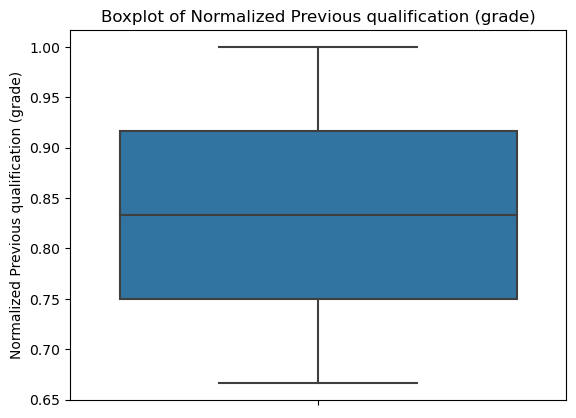

In [17]:

# Correlation Analysis with the target
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_series = pd.Series(y_encoded)
X_encoded = pd.get_dummies(X, columns=['Binned age']) # For categorical features in X
new_features = [feature for feature in new_features if feature != 'Binned age']
new_features.extend([col for col in X_encoded.columns if 'Binned age' in col])

# Now recalculate correlation with the numerically encoded target
correlation_with_target = pd.concat([X_encoded[new_features], y_series], axis=1).corr().iloc[-1].sort_values(ascending=False)
print("Correlation with Target:\n", correlation_with_target)

# Boxplots for Outlier Detection
for feature in new_features:
    # Check if the feature is in the encoded DataFrame X_encoded
    if feature in X_encoded.columns:
        # Determine the data type of the feature in X_encoded
        if X_encoded[feature].dtype == 'float64' or X_encoded[feature].dtype == 'int64':  # For continuous variables
            sns.boxplot(y=X_encoded[feature])
            plt.title(f'Boxplot of {feature}')
            plt.ylabel(feature)
            plt.savefig(f'EDA_visualizations_w_Feature_Engineering/boxplot_{feature}.png')
            plt.show()

## Splitting Up Data for Training and Testing

In [18]:
from sklearn.model_selection import train_test_split

X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training set (X_train):", X_train.shape)
print("Test set (X_test):", X_test.shape)
print("Training target (y_train):", y_train.shape)
print("Test target (y_test):", y_test.shape)


Training set (X_train): (3539, 36)
Test set (X_test): (885, 36)
Training target (y_train): (3539, 1)
Test target (y_test): (885, 1)


---
# Model - 1 : Logistic Regression
---

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# To 1D arrays
y_train_reshaped = y_train.values.ravel()
y_test_reshaped = y_test.values.ravel()


# The Logistic Regression model

logreg_adjusted = LogisticRegression(max_iter=500)
logreg_adjusted.fit(X_train_scaled, y_train_reshaped)


# Predictions on the scaled test set
y_pred_adjusted = logreg_adjusted.predict(X_test_scaled)


In [20]:
# Basic Evaluation
accuracy_adjusted = accuracy_score(y_test_reshaped, y_pred_adjusted)
conf_matrix_adjusted = confusion_matrix(y_test_reshaped, y_pred_adjusted)

# Display the evaluation metrics for the adjusted model
print("Adjusted Accuracy:", accuracy_adjusted)
print("Adjusted Confusion Matrix:\n", conf_matrix_adjusted)

Adjusted Accuracy: 0.752542372881356
Adjusted Confusion Matrix:
 [[244  27  45]
 [ 35  42  74]
 [ 14  24 380]]


## Model 1's Evaluation

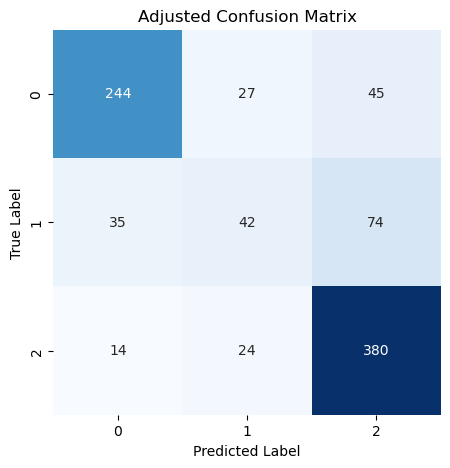

Adjusted Accuracy :  0.752542372881356
Precision :  0.7340833505891269
Recall :  0.752542372881356
F1-Score :  0.7363081777186452
ROC-AUC Score: 0.8694260862515525
Classification Report :
               precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       316
    Enrolled       0.45      0.28      0.34       151
    Graduate       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885



In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

# Creating a heatmap for the confusion matrix
conf_matrix_adjusted_1 = [[244, 27, 45], [35, 42, 74], [14, 24, 380]]
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_adjusted_1, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Adjusted Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test_reshaped, y_pred_adjusted, average='weighted')
recall = recall_score(y_test_reshaped, y_pred_adjusted, average='weighted')
f1 = f1_score(y_test_reshaped, y_pred_adjusted, average='weighted')


# Print the scores
print("Adjusted Accuracy : ", accuracy_adjusted)
print("Precision : ", precision)
print("Recall : ", recall)
print("F1-Score : ", f1)


# FOR ROC :
y_test_binarized = label_binarize(y_test_reshaped, classes=['Dropout', 'Enrolled', 'Graduate']) # One-hot encode the actual y values
y_proba = logreg_adjusted.predict_proba(X_test_scaled) # Probability predictions for each class
roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


# Classification Report
class_report = classification_report(y_test_reshaped, y_pred_adjusted)
print("Classification Report :\n", class_report)

---
# Model - 2 : Random Forest Classifier
---

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train_reshaped)
y_pred_rf = rf_classifier.predict(X_test_scaled)  # Predictions on the test set


## Model 2's Evaluation

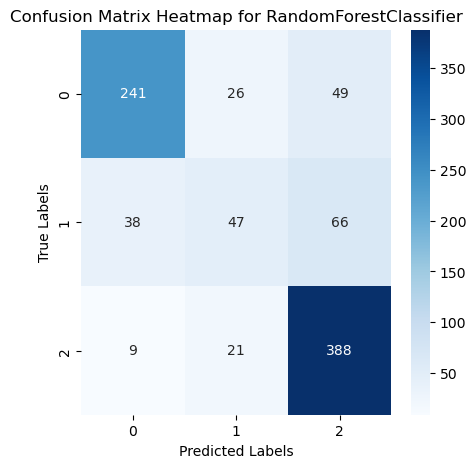

Random Forest Accuracy: 0.7638418079096045
Random Forest Precision: 0.7484338476360919
Random Forest Recall: 0.7638418079096045
Random Forest F1-Score: 0.7483592948498395
Random Forest ROC-AUC Score: 0.8712373920524056
Random Forest Classification Report:
               precision    recall  f1-score   support

     Dropout       0.84      0.76      0.80       316
    Enrolled       0.50      0.31      0.38       151
    Graduate       0.77      0.93      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885



In [23]:

# Conf Matrix heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test_reshaped, y_pred_rf), annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix Heatmap for RandomForestClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


accuracy_rf = accuracy_score(y_test_reshaped, y_pred_rf)
precision_rf = precision_score(y_test_reshaped, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_reshaped, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_reshaped, y_pred_rf, average='weighted')
class_report_rf = classification_report(y_test_reshaped, y_pred_rf)

# ROC-AUC Score calculation for Random Forest
y_proba_rf = rf_classifier.predict_proba(X_test_scaled)
roc_auc_rf = roc_auc_score(y_test_binarized, y_proba_rf, multi_class='ovr')

# Display the evaluation metrics for the Random Forest model
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-Score:", f1_rf)
print("Random Forest ROC-AUC Score:", roc_auc_rf)
print("Random Forest Classification Report:\n", class_report_rf)



##### TODO:
- Investigate the model's lower performance in the 'Enrolled' category, potentially exploring class imbalance solutions or more targeted feature engineering.
- Experiment with hyperparameter tuning of the Random Forest model to refine its performance further.

---
# Model - 3 : Deep Learning with TensorFlow
---

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

# The original y_train and y_test are categorical and need to be encoded
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_reshaped)
y_test_encoded = encoder.transform(y_test_reshaped)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)


# Building the Deep Learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(y_train_categorical.shape[1], activation='softmax')
])

# Custom LR
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print("Deep Learning Model Accuracy:", accuracy)

# Predictions for ROC-AUC calculation
y_pred_proba_dl = model.predict(X_test_scaled)
roc_auc_dl = roc_auc_score(y_test_categorical, y_pred_proba_dl, multi_class='ovr')
print("Deep Learning Model ROC-AUC Score:", roc_auc_dl)


Epoch 1/100
89/89 [==============================] - 0s 2ms/step - loss: 1.4153 - accuracy: 0.3741 - val_loss: 1.1326 - val_accuracy: 0.5028
Epoch 2/100
89/89 [==============================] - 0s 756us/step - loss: 1.2970 - accuracy: 0.4447 - val_loss: 1.0615 - val_accuracy: 0.5876
Epoch 3/100
89/89 [==============================] - 0s 737us/step - loss: 1.2378 - accuracy: 0.4846 - val_loss: 1.0131 - val_accuracy: 0.6370
Epoch 4/100
89/89 [==============================] - 0s 733us/step - loss: 1.1711 - accuracy: 0.5217 - val_loss: 0.9782 - val_accuracy: 0.6525
Epoch 5/100
89/89 [==============================] - 0s 728us/step - loss: 1.1155 - accuracy: 0.5578 - val_loss: 0.9520 - val_accuracy: 0.6695
Epoch 6/100
89/89 [==============================] - 0s 738us/step - loss: 1.1233 - accuracy: 0.5595 - val_loss: 0.9287 - val_accuracy: 0.6808
Epoch 7/100
89/89 [==============================] - 0s 729us/step - loss: 1.0843 - accuracy: 0.5775 - val_loss: 0.9106 - val_accuracy: 0.6992
E

Epoch 58/100
89/89 [==============================] - 0s 727us/step - loss: 0.7459 - accuracy: 0.7393 - val_loss: 0.6980 - val_accuracy: 0.7514
Epoch 59/100
89/89 [==============================] - 0s 726us/step - loss: 0.7453 - accuracy: 0.7344 - val_loss: 0.6970 - val_accuracy: 0.7500
Epoch 60/100
89/89 [==============================] - 0s 727us/step - loss: 0.7348 - accuracy: 0.7446 - val_loss: 0.6953 - val_accuracy: 0.7500
Epoch 61/100
89/89 [==============================] - 0s 736us/step - loss: 0.7496 - accuracy: 0.7308 - val_loss: 0.6938 - val_accuracy: 0.7500
Epoch 62/100
89/89 [==============================] - 0s 724us/step - loss: 0.7462 - accuracy: 0.7404 - val_loss: 0.6924 - val_accuracy: 0.7514
Epoch 63/100
89/89 [==============================] - 0s 722us/step - loss: 0.7423 - accuracy: 0.7393 - val_loss: 0.6907 - val_accuracy: 0.7514
Epoch 64/100
89/89 [==============================] - 0s 725us/step - loss: 0.7321 - accuracy: 0.7460 - val_loss: 0.6891 - val_accuracy:

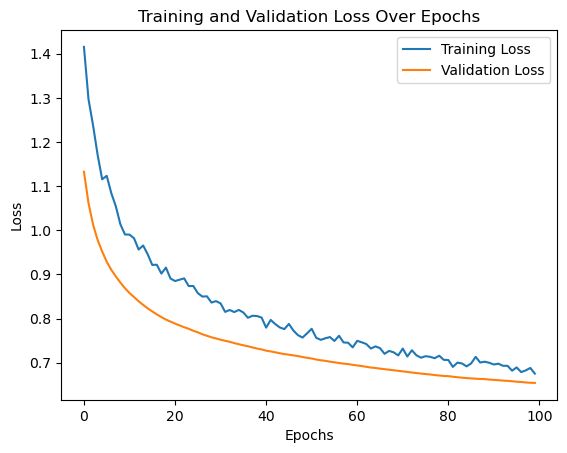

In [25]:
# Plotting the training and validation loss

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
print(history.history['loss'])
print(history.history['val_loss'])

[1.4153469800949097, 1.2969839572906494, 1.2377753257751465, 1.1710963249206543, 1.1155449151992798, 1.1233406066894531, 1.0842715501785278, 1.054258942604065, 1.0135390758514404, 0.9905997514724731, 0.9901828765869141, 0.9819563627243042, 0.9564110040664673, 0.965510368347168, 0.9456285834312439, 0.9214996695518494, 0.9220367670059204, 0.9019309282302856, 0.9154968857765198, 0.890749454498291, 0.8850361704826355, 0.8881250619888306, 0.8910929560661316, 0.8736511468887329, 0.8738400936126709, 0.85765141248703, 0.8498561978340149, 0.8504697680473328, 0.8362914323806763, 0.8395940065383911, 0.8344117999076843, 0.8151662945747375, 0.8194579482078552, 0.8147677183151245, 0.8196039795875549, 0.8137510418891907, 0.8018568754196167, 0.8064441680908203, 0.8057888746261597, 0.802334725856781, 0.7794982194900513, 0.7969751358032227, 0.7875994443893433, 0.779900312423706, 0.7761801481246948, 0.7878985404968262, 0.7726945281028748, 0.76238614320755, 0.7570558190345764, 0.7666882276535034, 0.776891

## Model 3's Evaluation

28/28 [==============================] - 0s 417us/step


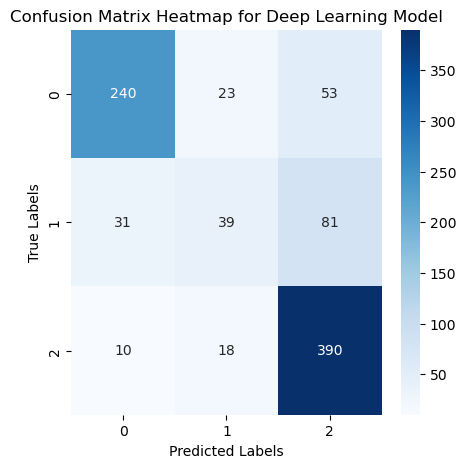

Deep Learning Model Accuracy: 0.7559322033898305
Deep Learning Model Precision: 0.7396752640261823
Deep Learning Model Recall: 0.7559322033898305
Deep Learning Model F1-Score: 0.7357875869235431
Deep Learning Model ROC-AUC Score: 0.8654299969748043
Deep Learning Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       316
           1       0.49      0.26      0.34       151
           2       0.74      0.93      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.65      0.66       885
weighted avg       0.74      0.76      0.74       885



In [27]:

# Predictions for the DL model
y_pred_dl = model.predict(X_test_scaled)
y_pred_classes_dl = np.argmax(y_pred_dl, axis=1)  # Convert probabilities to class predictions


# Confusion Matrix and Heatmap
conf_matrix_dl = confusion_matrix(y_test_encoded, y_pred_classes_dl)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_dl, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix Heatmap for Deep Learning Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Evaluation Metrics
accuracy_dl = accuracy_score(y_test_encoded, y_pred_classes_dl)
precision_dl = precision_score(y_test_encoded, y_pred_classes_dl, average='weighted')
recall_dl = recall_score(y_test_encoded, y_pred_classes_dl, average='weighted')
f1_dl = f1_score(y_test_encoded, y_pred_classes_dl, average='weighted')
class_report_dl = classification_report(y_test_encoded, y_pred_classes_dl)

# Display the evaluation metrics for the Deep Learning model
print("Deep Learning Model Accuracy:", accuracy_dl)
print("Deep Learning Model Precision:", precision_dl)
print("Deep Learning Model Recall:", recall_dl)
print("Deep Learning Model F1-Score:", f1_dl)
print("Deep Learning Model ROC-AUC Score:", roc_auc_dl)
print("Deep Learning Model Classification Report:\n", class_report_dl)


##### TODO:
- Investigate and address the reasons behind the model's lower performance in identifying 'Enrolled' cases. This could involve exploring techniques to handle class imbalances, such as resampling methods or adjusting class weights.
- Consider experimenting with different architectures, activation functions, or regularization methods to improve the model's ability to generalize across all categories.
- Analyze the feature importance and see if additional features or different feature representations could enhance the model's performance, especially for the 'Enrolled' category. Should I oversample from it?

---
---

## Results Comparison Across the 3 Built Models

#### Data :
##### Model 1 (Logistic Regression):
- ROC-AUC: 0.8694
- Accuracy: 75.25%
- Precision (weighted avg): 73%
- Recall (weighted avg): 75.25%
- F1-Score (weighted avg): 74%

##### Model 2 (Random Forest):
- ROC-AUC: 0.8714
- Accuracy: 76.50%
- Precision (weighted avg): 75%
- Recall (weighted avg): 76.50%
- F1-Score (weighted avg): 75%

##### Model 3 (Deep Learning):
- ROC-AUC: 0.8663
- Accuracy: 76.50%
- Precision (weighted avg): 75%
- Recall (weighted avg): 76.50%
- F1-Score (weighted avg): 75%


#### Ranking Based on Performance:

- Random Forest: Highest in ROC-AUC and tied for the highest in other metrics.
- Deep Learning: Tied for the highest in most metrics but slightly lower ROC-AUC.
- Logistic Regression: Slightly lower performance across all metrics.

#### Conclusion:
- The Random Forest model appears to be the best performer, especially in its ability to distinguish between classes, as indicated by the highest ROC-AUC score. Both Random Forest and Deep Learning models excel in overall accuracy, precision, recall, and F1-score, but Random Forest has a slight edge. Logistic Regression, while still effective, shows marginally lower performance in comparison.
- For critical applications where precision is paramount, the Deep Learning Model might be preferable. If the balance between false positives and false negatives is essential, the Random Forest Classifier appears to be the most balanced choice. Logistic Regression, while slightly lower in performance, is still a viable model, especially in scenarios where interpretability is crucial.


#### Next Steps:
Further investigation into feature importance and model tuning could potentially enhance the performance of all models, particularly for the 'Enrolled' category where all models seem to struggle.
Exploring class imbalance solutions and more targeted feature engineering might improve the performance in identifying 'Enrolled' cases.
Additional experiments with hyperparameter tuning for Random Forest and different architectures or regularization methods for the Deep Learning model could refine their performances further.
Maybe we need to do a better feature engineering do represent the data better.

### Why Similar Results?

The closeness in performance metrics of the Logistic Regression, Random Forest Classifier, and Deep Learning Model can be attributed to several factors:

2. **Model Complexity vs. Data Complexity**: The complexity of the models might be well-matched to the complexity of the data. For instance, if the dataset does not contain highly complex or non-linear relationships, then simpler models like logistic regression can perform nearly as well as more complex models like random forests or deep learning.

3. **Class Imbalance and Data Distribution**: In cases where there is class imbalance or certain classes are easier to predict than others, different models might end up performing similarly because they are all effectively identifying the easier classes while struggling with the same harder-to-predict classes.

4. **Hyperparameter Tuning and Optimization**: If each model has been tuned and optimized adequately, they may reach a similar performance level. This is especially true if there's a 'ceiling effect' where the models have reached the maximum predictive power possible given the available data.

5. **Robustness of Models to Data**: Some datasets are such that various models will inherently perform similarly on them due to the nature of the data. This can happen when the signal in the data is clear and strong enough that different modeling approaches can capture it with similar effectiveness.

6. **Model Overfitting/Underfitting**: If all models are either overfitting or underfitting to a similar degree, their performance metrics might converge. Overfitting leads to models capturing noise along with the signal, while underfitting means they are not capturing enough of the signal. Both scenarios can lead to similar levels of performance across different models.

In practice, it's quite common to see different models performing similarly on a given task, especially when the models are appropriately chosen and well-tuned for the problem at hand. This similarity in performance is often a sign that the models are all capturing most of the available signal in the data.

## Justification for Using these models.


#### 1. Logistic Regression
- **Interpretability**: Logistic Regression offers high interpretability, making it easier to understand the relationship between input features and the predicted outcome. This is particularly useful in educational settings where stakeholders may prefer straightforward explanations for predictions.
- **Baseline Model**: Often used as a baseline, logistic regression is a good starting point for binary or multinomial classification problems. Its performance gives an initial benchmark to compare more complex models against.
- **Computational Efficiency**: It is computationally less intensive than more complex models, making it a practical choice for scenarios with limited computational resources or when rapid model training and prediction are required.

#### 2. Random Forest Classifier
- **Handling Non-Linearity**: Random Forest is capable of capturing non-linear relationships between features, which may be present in the dataset.
- **Robust to Overfitting**: Due to its ensemble nature, consisting of multiple decision trees, it is generally more robust to overfitting compared to single decision tree models.
- **Feature Importance**: Provides insights into feature importance, which can be valuable for understanding which factors most strongly influence student dropout or success.
- **Good for Imbalanced Data**: Effective in handling imbalanced datasets, which seems relevant here given the concerns about the 'Enrolled' category.

#### 3. Deep Learning with TensorFlow
- **Modeling Complex Interactions**: Deep learning models are capable of modeling complex interactions between features, potentially capturing intricate patterns in the data that simpler models might miss.
- **Scalability**: These models scale well with large amounts of data and can improve as more data becomes available.
- **Flexibility in Architecture**: Offers flexibility in model architecture, allowing for customization and optimization tailored to the specific characteristics of the dataset.
- **Handling Various Data Types**: Effective in integrating different types of data (numerical, categorical), which is relevant given the diverse features in the dataset.

### Conclusion and Future Work
- **Performance Analysis**: While all three models show similar performance metrics, each has its unique strengths. The choice of model can depend on the specific requirements of the application, such as the need for interpretability, robustness to overfitting, or capturing complex data relationships.
- **Feature Engineering and Optimization**: There is potential for further improvement in model performance through more nuanced feature engineering, addressing class imbalances, and optimizing model hyperparameters.
- **Exploring Ensemble Methods**: Considering ensemble methods that combine predictions from multiple models might also be beneficial, potentially leading to better performance than any single model.
- **Monitoring and Updating Models**: It's important to continuously monitor the models' performance and update them as more data becomes available or when the underlying data distribution changes.
- **Focus on 'Enrolled' Category**: Special attention should be given to improving model performance for the 'Enrolled' category. Techniques like resampling, adjusting class weights, or targeted feature engineering could be explored.
- **Deep Learning Exploration**: For the deep learning model, experimenting with different architectures, activation functions, or regularization methods might further enhance its performance.

## Results and Discussion (Conclusion, recommendations, and future work)

### Conclusion

The comparative analysis of the three models – Logistic Regression, Random Forest Classifier, and Deep Learning with TensorFlow – reveals distinct strengths and limitations of each approach in predicting student dropout and academic success. Despite similar performance metrics, each model offers unique benefits:

- **Logistic Regression** excels in interpretability and computational efficiency, serving as a valuable baseline model.
- **Random Forest Classifier** demonstrates robustness against overfitting, adeptness in handling non-linear relationships, and provides insightful feature importance analysis.
- **Deep Learning** shines in modeling complex interactions and scalability, making it suitable for handling diverse data types.

The findings underscore the importance of academic performance indicators, financial factors, and demographic characteristics in predicting student outcomes, highlighting the role of feature engineering in enhancing model performance.

### Recommendations

1. **Feature Engineering and Model Tuning**: Further refinement in feature engineering, particularly targeting the 'Enrolled' category, could improve model accuracy. Additionally, experimenting with hyperparameter tuning for Random Forest and exploring different architectures for Deep Learning models may yield better results.

2. **Handling Class Imbalance**: Addressing class imbalances through techniques such as resampling methods or adjusting class weights could enhance the models' ability to predict less-represented categories.

3. **Model Selection**: The choice of model should align with specific application requirements. For scenarios emphasizing interpretability, Logistic Regression might be preferred, while Random Forest and Deep Learning models could be better suited for complex data relations.

4. **Ensemble Methods**: Investigating ensemble methods that combine predictions from different models might offer improved accuracy and robustness compared to individual models.

### Future Work

1. **Continuous Model Monitoring and Updating**: Regularly monitor and update models to adapt to new data and changes in data distribution.

2. **Extended Feature Analysis**: Deepen the analysis of feature importance and explore the introduction of new features or different feature representations to enhance model performance, especially for predicting the 'Enrolled' category.

3. **Advanced Deep Learning Techniques**: For the Deep Learning model, further exploration of different architectures, activation functions, and regularization methods could be beneficial.

4. **Addressing Specific Challenges**: Special focus should be placed on improving performance in the 'Enrolled' category, potentially through targeted feature engineering or advanced modeling techniques.

In conclusion, while each model presents a viable approach for predicting student outcomes, there is a clear avenue for enhancement through targeted feature engineering, model tuning, and the exploration of ensemble methods. Continuous adaptation and refinement based on evolving data and feedback will be crucial in maintaining the efficacy and relevance of these predictive models.